<a href="https://colab.research.google.com/github/Shadabur-Rahaman/30-days-ml-projects/blob/main/Day_17_KMeans_Customer_Segmentation_Cleaned/notebooks/Day_17_KMeans_Customer_Segmentation_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Day 17: Clustering with K-Means

**Unsupervised Learning** for customer segmentation using **K-Means** clustering.

**Goal:** Segment customers into groups based on their features and visualize clusters.

In [1]:
# 📦 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

## 🔢 Generate Synthetic Customer Data

In [2]:
# Create synthetic data with 5 clusters
X, y_true = make_blobs(n_samples=300,
                     centers=5,
                     cluster_std=1.0,
                     random_state=42)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df.head()

,Feature1,Feature2
0,-0.623012,9.188864
1,0.543714,5.305206
2,-2.300334,7.054616
3,4.416416,2.687170
4,-3.837384,9.211147


## 📈 Visualize Raw Data

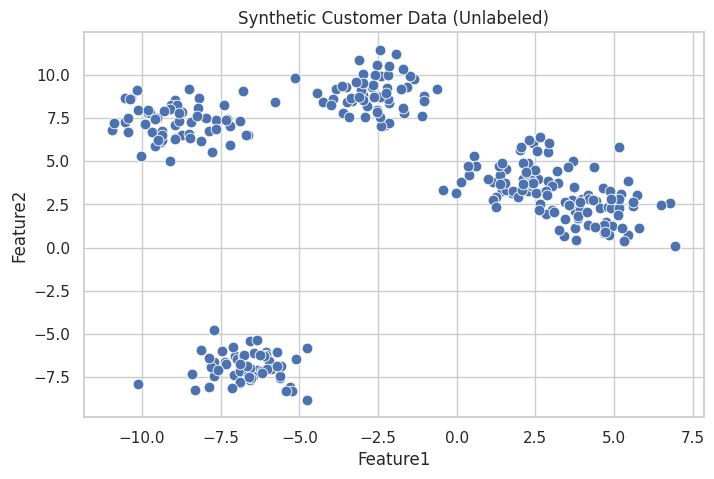

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Feature1'], y=df['Feature2'], s=60)
plt.title('Synthetic Customer Data (Unlabeled)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.savefig("raw_data_plot.png")
plt.show()

## 🔍 Determine Optimal Number of Clusters (Elbow Method)

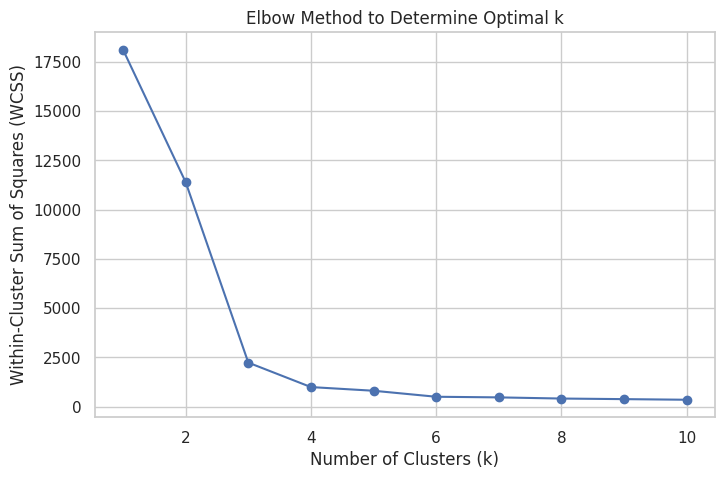

In [7]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.savefig("elbow_method_plot.png")
plt.show()

## 🌐 Fit K-Means and Evaluate with Silhouette Score

In [5]:
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(df)
df['Cluster'] = clusters

score = silhouette_score(df[['Feature1', 'Feature2']], df['Cluster'])
print(f"✅ Silhouette Score for k={k_opt}: {score:.3f}")

✅ Silhouette Score for k=5: 0.653


## 🎨 Visualize Clustered Data

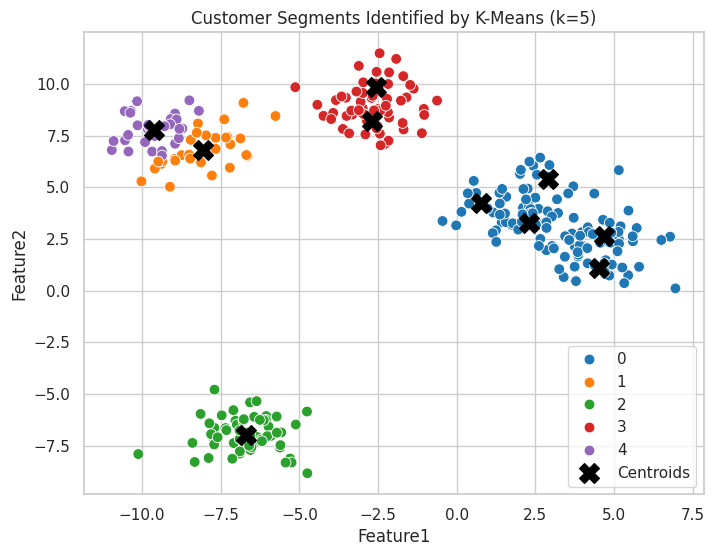

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Cluster', palette='tab10', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title('Customer Segments Identified by K-Means (k=5)')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.savefig("clustered_data_plot.png")
plt.show()

## ✅ Summary

- Created synthetic data with 5 customer segments.
- Used Elbow Method to identify optimal number of clusters.
- Trained KMeans and evaluated with **Silhouette Score**.
- Visualized clusters and centroids clearly.

**Next Steps:** Try on real-world datasets like Mall Customers or Online Retail.